In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

from sklearn.cluster import DBSCAN


/Users/berk/dev/ml-hw2/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:

# The dataset is already preprocessed...
dataset = pickle.load(open("../datasets/part3_dataset.data", "rb"))
dataset.shape

(2004, 3072)

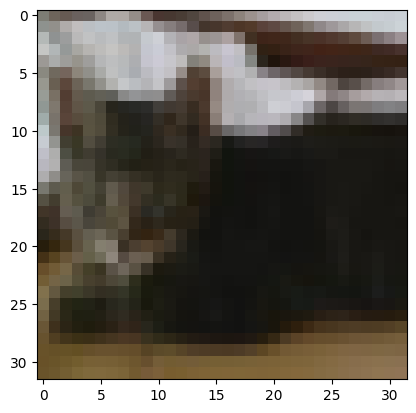

In [9]:
# show dataset img
plt.imshow(dataset[3].reshape(32, 32,3))

{-1}


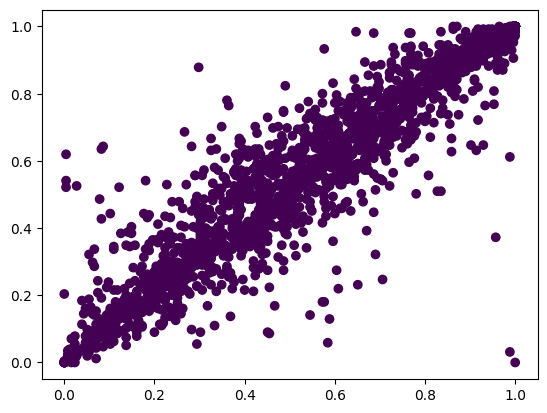

In [12]:
model = DBSCAN(eps=0.5, min_samples=5)
labels = model.fit_predict(dataset)

print(set(labels))



# show dataset img
plt.scatter(dataset[:,0], dataset[:,1], c=model.labels_)
plt.show()


In [24]:
# find best parameters for dbscan
# check with silhouette score
from sklearn.metrics import silhouette_score

best_score = np.NINF
best_conf = None

for eps in np.arange(0.0001, 0.01, 0.0001):
    for min_samples in range(2, 10):
        model = DBSCAN(eps=eps, min_samples=min_samples, metric='cosine')
        labels = model.fit_predict(dataset)

        if len(set(labels)) > 1:
            score = silhouette_score(dataset, labels)
            print(f"eps: {eps}, min_samples: {min_samples}, silhouette_score: {score}")
            if score > best_score:
                best_score = score
                best_conf = (eps, min_samples)
print(f"best parameters: eps: {best_conf[0]}, min_samples: {best_conf[1]}, silhouette_score: {best_score}")


eps: 0.006, min_samples: 2, silhouette_score: 0.1036863625049591
eps: 0.0061, min_samples: 2, silhouette_score: 0.1036863625049591
eps: 0.006200000000000001, min_samples: 2, silhouette_score: 0.1036863625049591
eps: 0.006300000000000001, min_samples: 2, silhouette_score: 0.1036863625049591
eps: 0.0064, min_samples: 2, silhouette_score: 0.1036863625049591
eps: 0.006500000000000001, min_samples: 2, silhouette_score: 0.1036863625049591
eps: 0.006600000000000001, min_samples: 2, silhouette_score: 0.1036863625049591
eps: 0.0067, min_samples: 2, silhouette_score: 0.1036863625049591
eps: 0.0068000000000000005, min_samples: 2, silhouette_score: 0.1036863625049591
eps: 0.006900000000000001, min_samples: 2, silhouette_score: 0.1036863625049591
eps: 0.007000000000000001, min_samples: 2, silhouette_score: 0.1036863625049591
eps: 0.0071, min_samples: 2, silhouette_score: 0.1036863625049591
eps: 0.007200000000000001, min_samples: 2, silhouette_score: 0.1036863625049591
eps: 0.007300000000000001, min